In [12]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [13]:
# Carregando os dados
dados_hm = pd.read_csv('output/hashmapLS_data.csv', sep=' ', low_memory=False)
dados_hmls = pd.read_csv('output/hashmap_data.csv', sep=' ', low_memory=False)

In [14]:
dados_hm

,test_name,total_test_iteration,time_per_op,time_per_op_un,size_per_op,size_per_op_un,allocs_per_op,allocs_per_op_un,flag1,flag2,exec_time,num
0,BenchmarkHashMapLSGet,500000,2486,ns/op,248,B/op,4,allocs/op,ok,command-line-arguments,2.188s,100
1,BenchmarkHashMapLSGet,500000,2524,ns/op,248,B/op,4,allocs/op,ok,command-line-arguments,2.230s,100
2,BenchmarkHashMapLSGet,500000,2534,ns/op,255,B/op,4,allocs/op,ok,command-line-arguments,2.230s,100
3,BenchmarkHashMapLSGet,500000,2653,ns/op,301,B/op,4,allocs/op,ok,command-line-arguments,1.382s,100
4,BenchmarkHashMapLSGet,500000,2404,ns/op,252,B/op,4,allocs/op,ok,command-line-arguments,2.118s,100
...,...,...,...,...,...,...,...,...,...,...,...,...
199,BenchmarkHashMapLSGet,500000,2850,ns/op,330,B/op,8,allocs/op,ok,command-line-arguments,3.155s,100000
200,BenchmarkHashMapLSGet,500000,2850,ns/op,338,B/op,8,allocs/op,ok,command-line-arguments,2.853s,100000
201,BenchmarkHashMapLSGet,500000,2883,ns/op,332,B/op,8,allocs/op,ok,command-line-arguments,3.334s,100000
202,BenchmarkHashMapLSGet,500000,2873,ns/op,332,B/op,8,allocs/op,ok,command-line-arguments,3.299s,100000


In [15]:
# dados_hm.num = pd.to_numeric(dados_hm.num)

In [16]:
dados_hm['exec_time'] = pd.to_numeric(dados_hm['exec_time'].str[:-1], downcast='float')
dados_hm_filtered = dados_hm.filter(['exec_time', 'num'])
dados_hm_filtered['num'] = dados_hm_filtered['num'].astype(np.str)

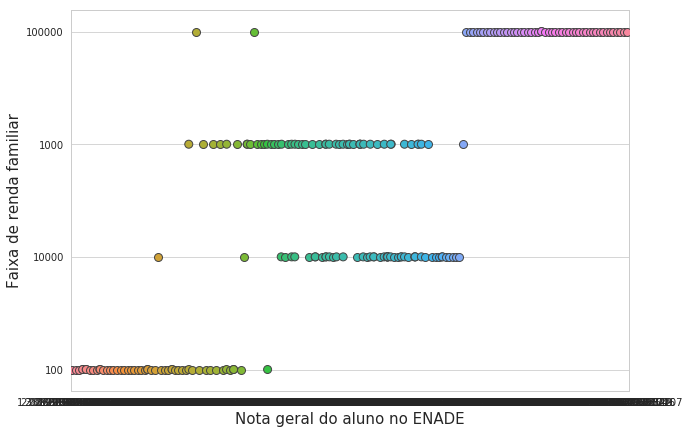

In [17]:
fig, gph = plt.subplots(figsize=(10,7))

gph = sns.stripplot(x='exec_time', y='num', data=dados_hm_filtered.sort_values(by='num', ascending=True), s=8, lw=1, jitter=True, linewidth=1)

# gph.set_title('Custo por aluno das Universidades Federais \ndo Brasil em 2016 x Conceito do Enade por curso', fontsize=20)

gph.set_ylabel('Faixa de renda familiar', fontsize=15)

gph.set_xlabel('Nota geral do aluno no ENADE', fontsize=15)

plt.show()

In [18]:
plt.close(fig)

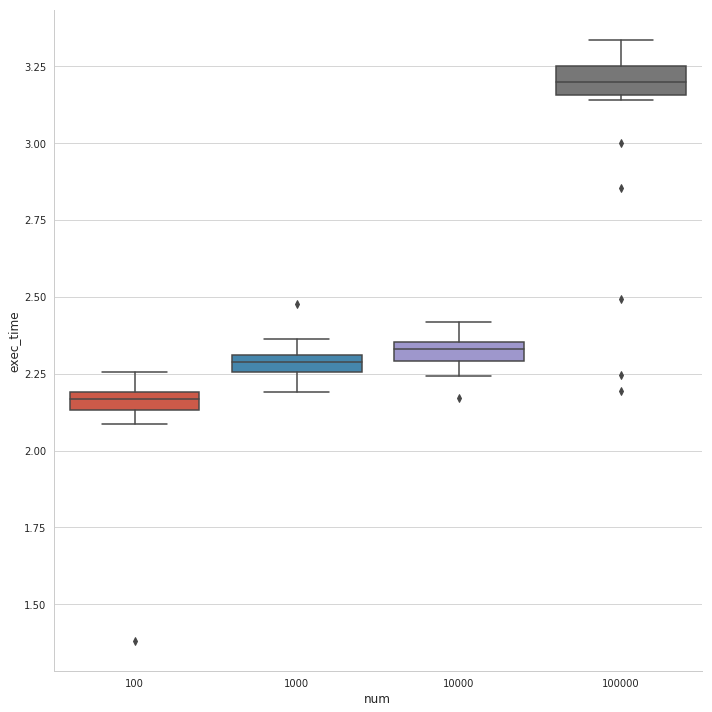

In [19]:
sns.catplot(x="num", y="exec_time", kind="box", data=dados_hm_filtered, height=10);

In [20]:
dados_hmls['exec_time'] = pd.to_numeric(dados_hmls['exec_time'].str[:-1], downcast='float')
dados_hmls_filtered = dados_hmls.filter(['exec_time', 'num'])
dados_hmls_filtered['num'] = dados_hmls_filtered['num'].astype(np.str)

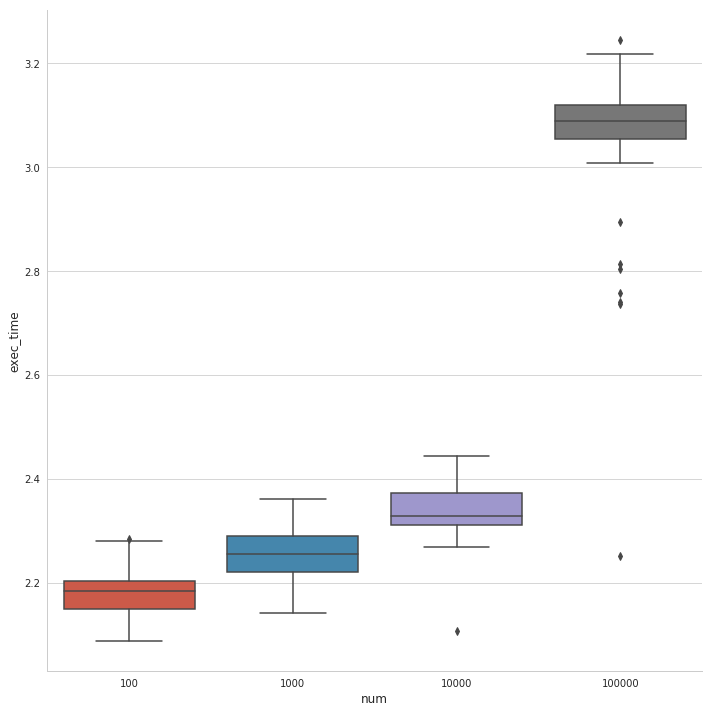

In [21]:
sns.catplot(x="num", y="exec_time", kind="box", data=dados_hmls_filtered, height=10);

In [22]:
dados_hm_all = pd.read_csv('output/hashmap_all_data.csv', sep=' ', low_memory=False)

In [23]:
dados_hm_all['exec_time'] = pd.to_numeric(dados_hm_all['exec_time'].str[:-1], downcast='float')
dados_hm_all_filtered = dados_hm_all.filter(['exec_time', 'num'])
dados_hm_all_filtered['num'] = dados_hm_all_filtered['num'].astype(np.str)

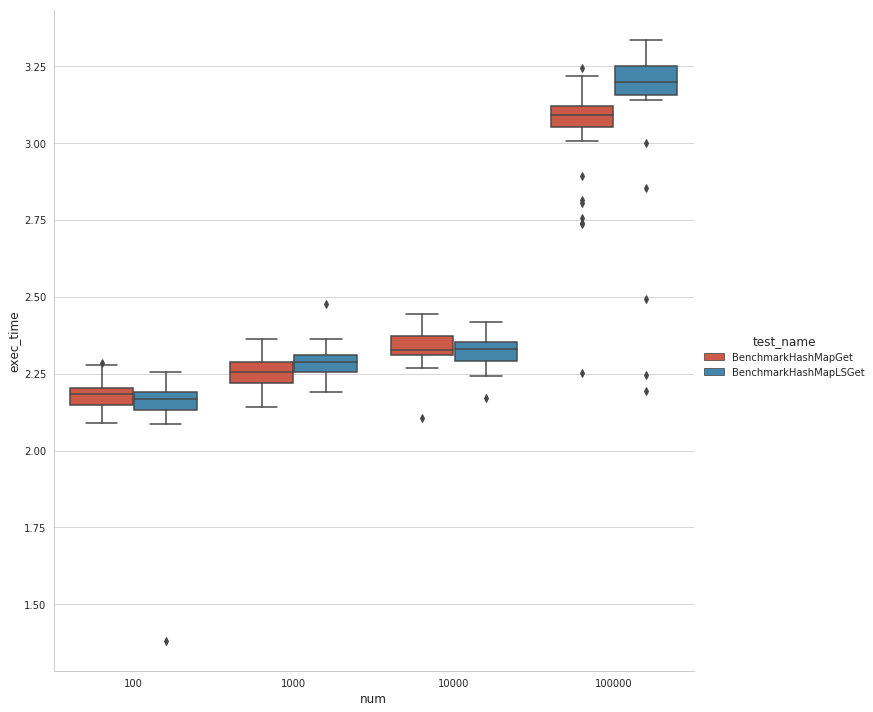

In [24]:
sns.catplot(x="num", y="exec_time", hue="test_name", kind="box", data=dados_hm_all, height=10)

In [25]:
dados_hm_ti_op = dados_hm_all
dados_hm_ti_op['num'] = dados_hm_ti_op['num'].astype(np.str)

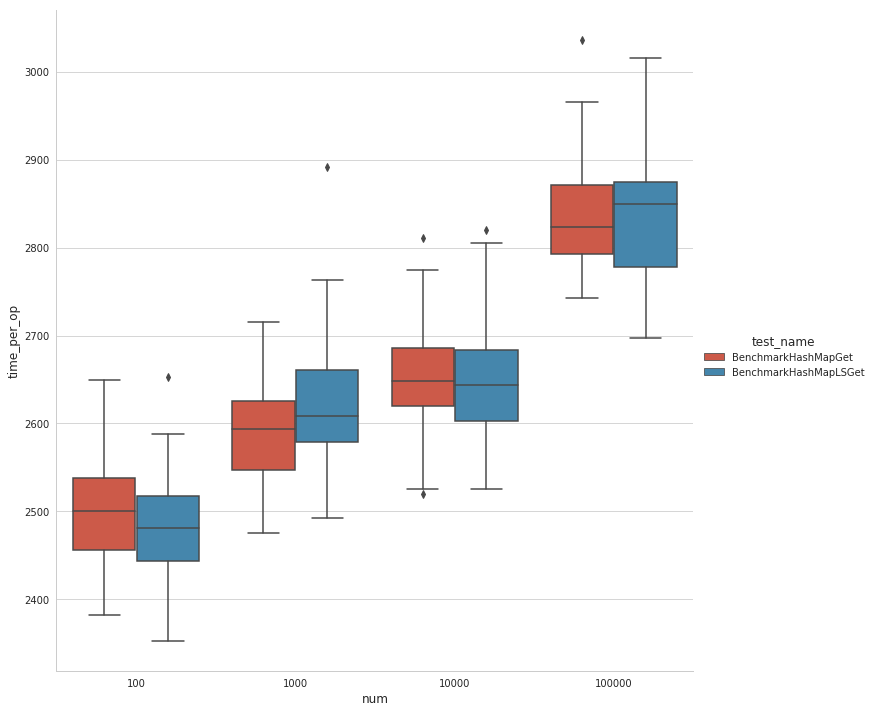

In [26]:
sns.catplot(x="num", y="time_per_op", hue="test_name", kind="box", data=dados_hm_ti_op, height=10)

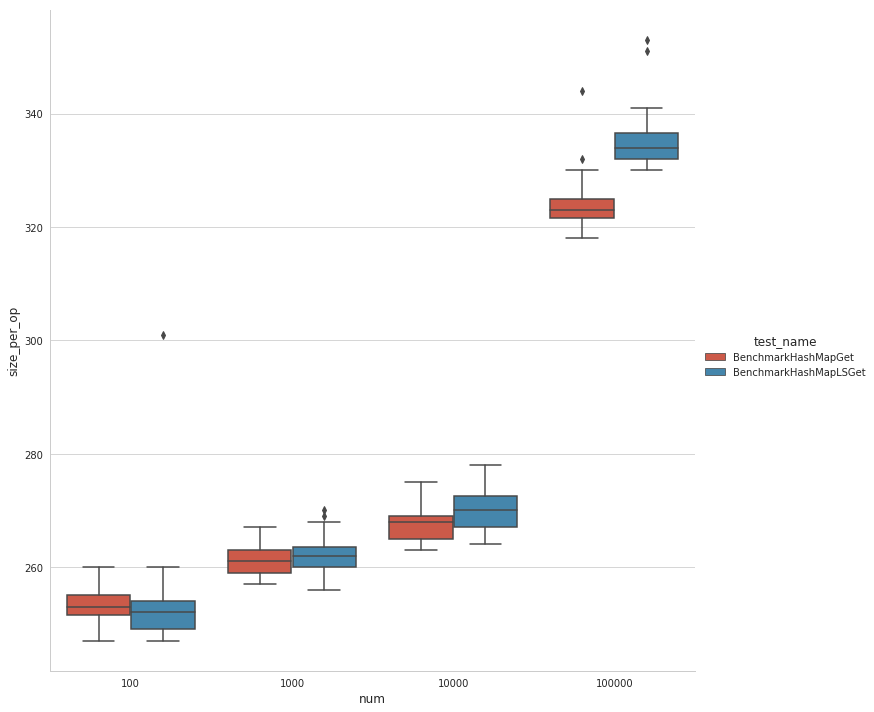

In [27]:
sns.catplot(x="num", y="size_per_op", hue="test_name", kind="box", data=dados_hm_ti_op, height=10)

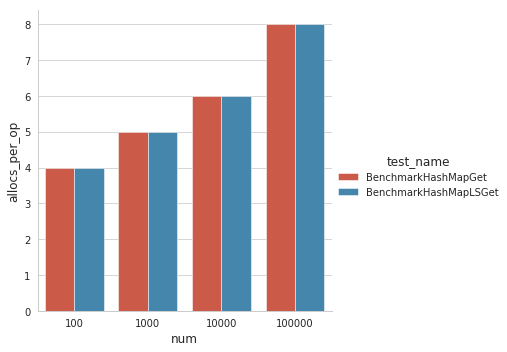

In [28]:
sns.catplot(x="num", y="allocs_per_op", hue="test_name", kind="bar", data=dados_hm_ti_op, height=5)